# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Data Loading

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the output of df.info(), we can see that this dataset consists of 200 rows and 5 columns. Here are the details of each column.

**CustomerID**: This contains a unique ID for each customer, with an int64 data type.

**Gender**: This shows the customer's gender, with an object (category) data type.

**Age**: This displays the customer's age in years, with an int64 data type.

**Annual Income (k$)**: This contains the customer's annual income in thousands of dollars, with an int64 data type.

**Spending Score (1-100)**: This shows the customer's spending score, ranging from 1 to 100, with an int64 data type.

All columns have non-null values, meaning there are no missing values ​​to handle.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Based on the descriptive statistics results displayed by df.describe(), we can see some important information about the numeric columns in the dataset.

CustomerID:

- This consists of 200 unique data with an average value of 100.5.

- Customer ID varies from 1 to 200.

Age

- Customer ages range from 18 to 70 years with an average of 38.85 years.

- Most customers are in the age range of 28.75 to 49 years (Q1 to Q3).

Annual Income (k$)

- Customer annual income varies between 15 to 137 thousand dollars with an average of 60.56 thousand dollars.

- Most customers have an annual income between 41.5 to 78 thousand dollars.

Spending Score (1–100)

- Customer spending scores range from 1 to 99 with an average spending score of 50.2.

- Most customers have a spending score between 34.75 and 73.

# EDA

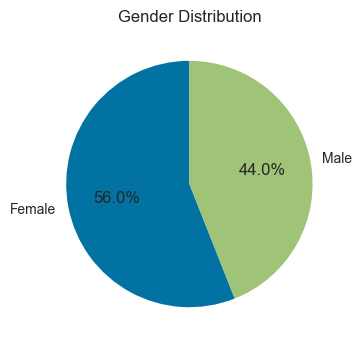

In [15]:
data_gender = df.Gender.value_counts()

plt.figure(figsize=(4,4))
plt.pie(data_gender, labels=data_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

From the pie chart shown, we can see that the percentage of women is greater than that of men, with 56% for women and 44% for men.

In [16]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

In [17]:
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

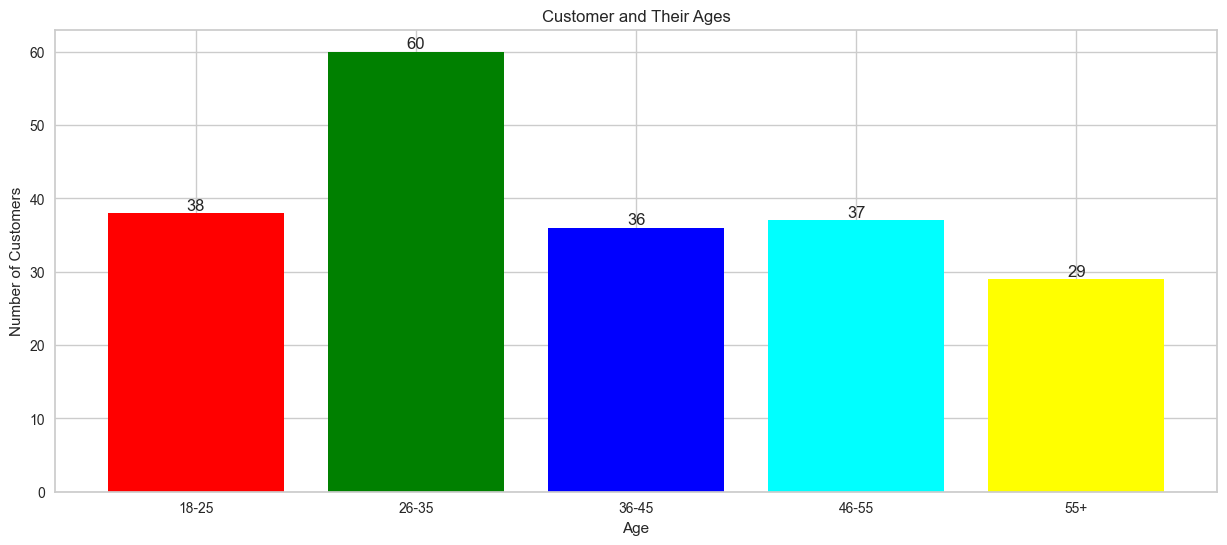

In [28]:
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

This visualization shows that the 26–35 age group is the largest among customers, while the 55+ age group has the smallest number of customers. This age distribution provides important insights into customer demographics and can help in planning marketing and service strategies.

In [29]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

In [30]:
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

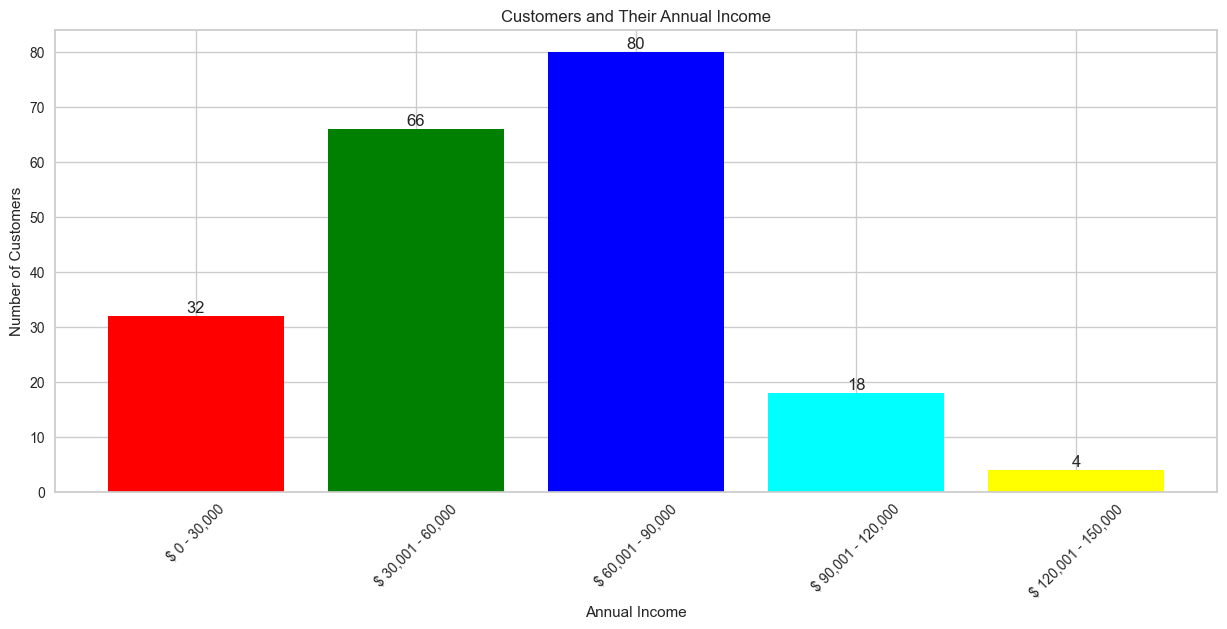

In [39]:
plt.figure(figsize=(15,6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Customers and Their Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
# plt.tight_layout()
plt.show()

This bar chart shows that the most customers are in the \\$60,001 – 90,000 income range, while the highest income category of \\$120,001 – 150,000 has the fewest customers. This chart provides insight into the distribution of customer income and can help in planning more effective marketing strategies.

# Data Splitting

In [47]:
# # Take the 'Annual Income (k$)' and 'Spending Score (1-100)' columns from the dataset and store them in an array X
# X = df.iloc[:, [3, 4]].values

# print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

In [46]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Elbow Method

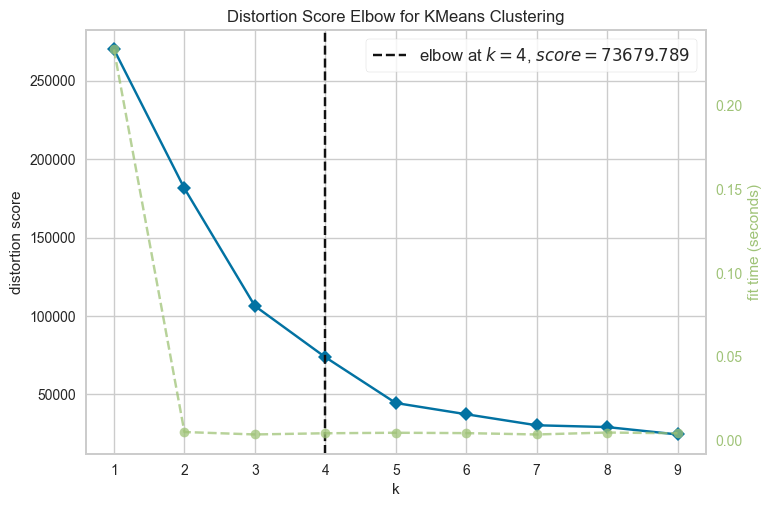

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
#KMeans model inisialization
kmeans = KMeans()

#KElbow visualizer inisalization
visualizer = KElbowVisualizer(kmeans, k=(1,10))

#fitting visualizer with the data
visualizer.fit(X)

#showing the graph
visualizer.show()

The results of the elbow method analysis show that the optimal number of clusters is 4 with a total within-cluster sum of squares (WCSS) value of 73,679,789. This means that dividing the data into 4 clusters provides the best balance between minimizing the distance within the cluster and maximizing the distance between clusters.

# Cluster Modeling (K-Means Clustering)

In [63]:
# Modeling kmeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

#get clusters label
labels = kmeans.labels_

k=4

X[labels==0]['Annual Income (k$)']

1      15
3      16
5      17
7      18
9      19
       ..
118    67
119    67
120    67
121    67
122    69
Name: Annual Income (k$), Length: 100, dtype: int64

In [65]:
def analyze_clusters(X, labels, k):
    print("Analysis of Characteristics of Each Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
 
        mean_income = cluster_data.iloc[:, 0].mean() 
        mean_spending = cluster_data.iloc[:, 1].mean()  
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mean of Annual Income (k$): {mean_income:.2f}")
        print(f"Mean of Spending Score (1-100): {mean_spending:.2f}")
        
analyze_clusters(X, labels, k)

Analysis of Characteristics of Each Cluster:

Cluster 1:
Mean of Annual Income (k$): 48.26
Mean of Spending Score (1-100): 56.48

Cluster 2:
Mean of Annual Income (k$): 86.54
Mean of Spending Score (1-100): 82.13

Cluster 3:
Mean of Annual Income (k$): 87.00
Mean of Spending Score (1-100): 18.63

Cluster 4:
Mean of Annual Income (k$): 26.30
Mean of Spending Score (1-100): 20.91


# Clustering Visualization

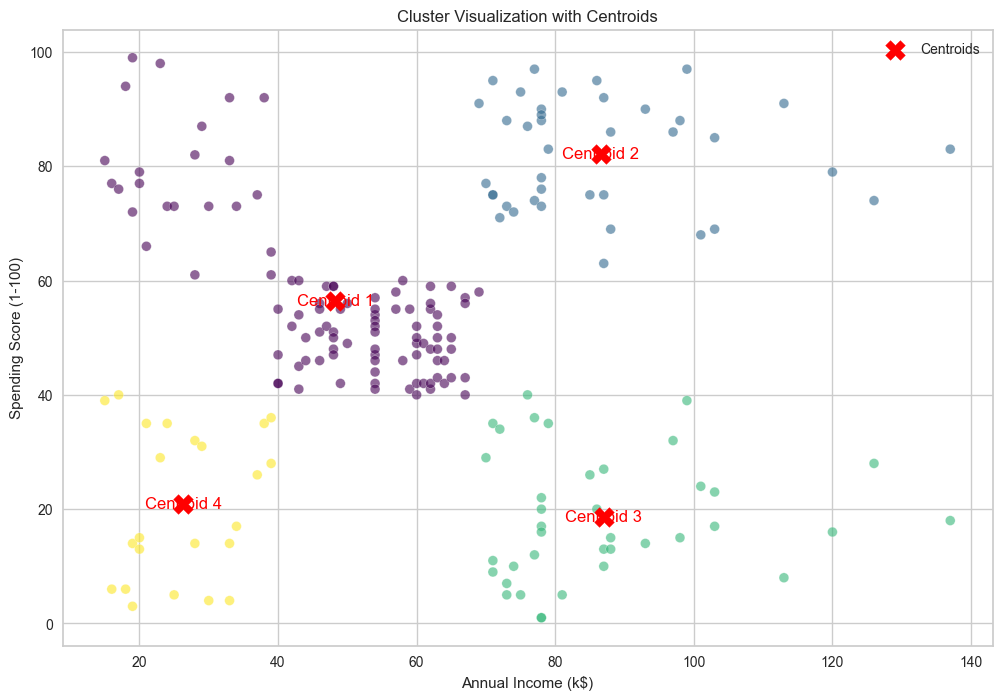

In [68]:
#Centroid position
centroids = kmeans.cluster_centers_

#Visualization
plt.figure(figsize=(12, 8))

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],c=labels, cmap='viridis', s=50,alpha=0.6, edgecolors='w', marker='o')

#plotting centroid
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X', label= 'Centroids')

#Centroid label to the plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Cluster Visualization with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

In [69]:
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


This provides an overview of the central characteristics of each customer cluster and helps in designing more effective marketing strategies.